# Integrating PySulfSat with PyMELTScalc
- This notebook can perform MELTS calculations, and then go onto calculate the SCSS and SCAS within a single notebook!
- It relies on the python MELTS architecture developed by Paula Antoshechkin at Caltech, and fractional crystallization functions written by Matthew Gleeson at UC Berkeley
- In addition to installing PySulfSat you will need to first download the MELTS python infrastructure from this website (https://magmasource.caltech.edu/gitlist/MELTS_Matlab.git/), and then the PyMELTScalc code by uncommenting below
- More information can be found here: https://github.com/gleesonm1/pyMELTScalc
You can download the excel spreadsheet with the compositions here:
- https://github.com/PennyWieser/PySulfSat/blob/main/docs/Examples/Integrating_with_PyMELTS/Glass_input_example.xlsx

## If you havent done so already, you need to pip install PySulfSat
- Do this by removing the #. You only need to do this once per computer. After your initial installation, you will want to upgrade instead using the second command


In [1]:
#!pip install PySulfSat
#!pip install PySulfSat --upgrade

## Now you need to append the path to your local MELTS installation

In [2]:
import sys
sys.path.append(r'G:\My Drive\Berkeley_NEW\MELTS_python_Paula\melts_matlab_git_master\package')

## And now you need to download the PyMELTScalc code by uncommenting this line
- you will need to be on at least 0.1.3 to get the logfo2 output needed here

In [3]:
#!pip install "https://github.com/gleesonm1/pyMELTScalc/archive/refs/tags/v0.1.5.zip"

     \ 27.2 MB 7.2 MB/s 0:00:03
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyMELTScalc: filename=pyMELTScalc-0.1.5-py3-none-any.whl size=40125 sha256=694d2b96ee39920addaf13ddcb8b5d492da0a595dda25b9895a59c98256e8ea2
  Stored in directory: C:\Users\penny\AppData\Local\Temp\pip-ephem-wheel-cache-0d4e_7hu\wheels\8e\3b\ee\de597abe353c33d3f09c1ba3b6f4ba0a77f4619404a6246f20
Successfully built pyMELTScalc
  Attempting uninstall: pyMELTScalc
    Found existing installation: pyMELTScalc 0.1.3
    Uninstalling pyMELTScalc-0.1.3:
      Successfully uninstalled pyMELTScalc-0.1.3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
import pyMELTScalc as M

In [4]:
### Use these version numbers when communicating problems to Penny (ss) and Matt (M.)

In [5]:
ss.__version__

'1.0.2'

In [6]:
M.__version__

'0.1.22'

## Import data
- Here, we load in some glass EPMA data, and then start a MELTS model from the first row in the loaded spreadsheet

In [9]:
df_out2=ss.import_data('Glass_input_example.xlsx', sheet_name='Glass_input', 
                       suffix="_Liq")
df_out2.head()
# Selecting a single composition to start the model from
sample=df_out2.iloc[0]

We have replaced all missing liquid oxides and strings with zeros. 


In [12]:
sample['CO2_Liq']=0.02

C:\Users\penny\AppData\Local\Temp\ipykernel_26324\3063343034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['CO2_Liq']=0.02
C:\Users\penny\AppData\Local\Temp\ipykernel_26324\3063343034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['CO2_Liq']=0.02


## Using PyMELTScalc
- Here we initiate a melts fractional crystallizatoin model, see the documentation for that package for more information

In [14]:
P=1000
MELTS_FC=M.multi_path(Model = "MELTSv1.1.0", 
                        Fe3Fet_Liq=0.1,
                          H2O_Liq=0.1,
                        bulk = sample.to_dict(), 
                        Frac_solid = True, 
                        Frac_fluid = True, 
                        find_liquidus = True,
                        T_end_C = 750, 
                        dt_C = 5, 
                        P_bar = P, 
                        )

Running MELTSv1.1.0 calculation... Complete (time taken = 14.38 seconds)

### Inspecting the outputs from this function

In [16]:
MELTS=MELTS_FC['All']
MELTS.head()

,T_C,P_bar,h,s,v,dvdp,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,...,Na2O_whitlockite1,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1,mass_whitlockite1,v_whitlockite1,rho_whitlockite1
0,1179.450000,1000.0,-1.180625e+06,264.228907,36.597608,-0.000216,-9.493145,50.376359,2.037972,13.118947,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1174.456395,1000.0,-1.182427e+06,262.986258,36.450859,-0.000176,-9.555366,50.354363,2.082255,13.335297,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1169.462791,1000.0,-1.150418e+06,254.830625,35.404814,-0.000142,-9.606961,50.318009,2.184598,13.182678,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1164.469186,1000.0,-1.084291e+06,240.778483,33.460689,-0.000138,-9.654746,50.272185,2.289600,13.026412,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1159.475581,1000.0,-1.023557e+06,227.844110,31.670329,-0.000133,-9.698839,50.215844,2.398557,12.864508,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## Lets see what phases it crystallized..

In [15]:
# Lets see what phases we have!
MELTS.columns[MELTS.columns.str.contains('SiO2')]

Index(['SiO2_Liq', 'SiO2_Cpx', 'SiO2_Plag', 'SiO2_Cpx2', 'SiO2_clinopyroxene3',
       'SiO2_Rhm', 'SiO2_Sp', 'SiO2_Ol', 'SiO2_whitlockite1'],
      dtype='object')

## Calculate SCSS using Li and Zhang 2022

In [16]:
LiZhang22=ss.calculate_LiZhang2022_SCSS(df=MELTS, T_K=MELTS['T_C']+273.15, 
P_kbar=P/1000, 
H2O_Liq=MELTS['H2O_Liq'], Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS['Fe3Fet_Liq'])
LiZhang22.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
replacing Fe3Fet_Liq in the original dataframe with that input into the function


,SCSS_Tot,T_C,P_bar,h,s,v,dvdp,logfO2,SiO2_Liq,TiO2_Liq,...,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,1104.020071,1179.700000,1000.0,-1.180676e+06,264.191326,36.590693,-0.000215,-9.490050,50.386348,2.038376,...,0.146193,0.094161,0.002000,0.092647,0.114037,0.045247,0.002953,0.001500,0.0,0.010448
1,1075.573818,1174.703488,1000.0,-1.182433e+06,262.979871,36.447230,-0.000177,-9.552640,50.364941,2.079988,...,0.148888,0.095228,0.002055,0.089173,0.111965,0.046377,0.003034,0.001541,0.0,0.010484
2,1090.295125,1169.706977,1000.0,-1.152237e+06,255.137742,35.448118,-0.000142,-9.604277,50.329109,2.182603,...,0.147465,0.098863,0.002176,0.087043,0.108845,0.047420,0.003201,0.001631,0.0,0.010803
3,1105.971498,1164.710465,1000.0,-1.085778e+06,241.015439,33.494277,-0.000138,-9.652070,50.283779,2.287906,...,0.146002,0.102486,0.002300,0.084862,0.105896,0.048407,0.003372,0.001724,0.0,0.011143
4,1122.831947,1159.713953,1000.0,-1.024749e+06,228.018965,31.695317,-0.000133,-9.696135,50.227892,2.397216,...,0.144479,0.106107,0.002430,0.082593,0.103140,0.049345,0.003548,0.001821,0.0,0.011508


## Smythe sulfide saturation model

In [17]:
Smythe_CalcSulf=ss.calculate_S2017_SCSS(df=MELTS, 
T_K=MELTS['T_C']+273.15, 
P_kbar=P/1000, Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=MELTS['Fe3Fet_Liq'])

Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


,SCSS2_ppm_ideal_Smythe2017,SCSS2_ppm_ideal_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,...,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1,mass_whitlockite1,v_whitlockite1,rho_whitlockite1,Fe_FeNiCu_Sulf_calc
0,1418.668555,387.537370,1452.850000,1.0,0.65,0.099881,0.473365,0.014401,0.145286,0.092073,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65
1,1403.504696,383.395062,1447.853488,1.0,0.65,0.099173,0.473420,0.014703,0.147939,0.088606,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65
2,1454.310353,397.273632,1442.856977,1.0,0.65,0.098508,0.473777,0.015451,0.146469,0.086456,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65
3,1511.400867,412.869035,1437.860465,1.0,0.65,0.098064,0.474064,0.016221,0.144961,0.084258,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65
4,1575.725176,430.440492,1432.863953,1.0,0.65,0.097842,0.474277,0.017022,0.143391,0.081972,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65


Text(0, 0.5, 'SCSS (Smythe, ppm)')

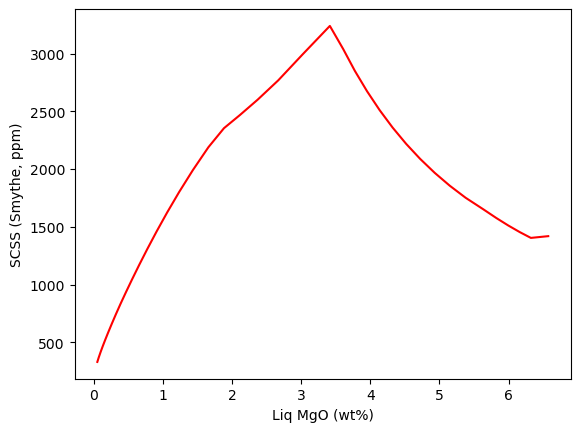

In [18]:
plt.plot(MELTS['MgO_Liq'], Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017'],
         '-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('SCSS (Smythe, ppm)')

Text(0, 0.5, 'Liq FeO (wt%)')

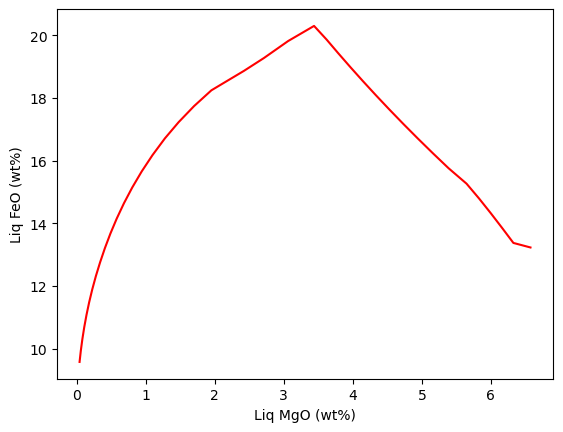

In [17]:
plt.plot( MELTS['MgO_Liq'],MELTS['FeOt_Liq'],
         '-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('Liq FeO (wt%)')

Text(0, 0.5, 'Liq FeO (wt%)')

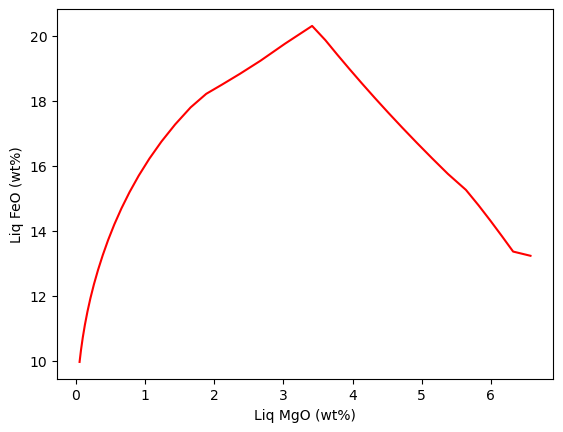

In [19]:
plt.plot( MELTS['MgO_Liq'],MELTS['FeOt_Liq'],
         '-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('Liq FeO (wt%)')

## Using Oneill

In [20]:
ONeill_MeasSulf=ss.calculate_O2021_SCSS(df=MELTS, T_K=MELTS['T_C']+273.15, 
P_kbar=P/1000,
Fe_FeNiCu_Sulf=0.66,
Fe3Fet_Liq=MELTS['Fe3Fet_Liq'])
ONeill_MeasSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,T_C,P_bar,h,s,...,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1,mass_whitlockite1,v_whitlockite1,rho_whitlockite1,Fe_FeNiCu_Sulf_calc
0,1369.766307,7.222395,-2.088187,-0.514565,7.809078,-2.160304,1179.700000,1000.0,-1.180676e+06,264.191326,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
1,1343.739977,7.203212,-2.073514,-0.515750,7.844952,-2.199505,1174.703488,1000.0,-1.182433e+06,262.979871,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
2,1370.825448,7.223168,-2.043557,-0.519793,7.881088,-2.181683,1169.706977,1000.0,-1.152237e+06,255.137742,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
3,1399.694219,7.244009,-2.015081,-0.523839,7.917487,-2.164719,1164.710465,1000.0,-1.085778e+06,241.015439,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
4,1430.732150,7.265942,-1.987881,-0.527901,7.954152,-2.148190,1159.713953,1000.0,-1.024749e+06,228.018965,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
